# In class exercises for 10.26.2020 (FFT + practice plotting + indexing)

[npy file format](https://www.numpy.org/devdocs/reference/generated/numpy.lib.format.html)

[npz file format (save several arrays)](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.savez.html)

[article about advantages of npy/npz format compared to csv and other common formats](https://towardsdatascience.com/why-you-should-start-using-npy-file-more-often-df2a13cc0161)

## First import data from eeg_data00.npz

In [54]:
# first import the modules that you'll need. 
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

# also define the default font we'll use for figures. 
fig_font = {'fontname':'Arial', 'size':'20'}

## load eeg_data00.npz...
* you should find that it has three arrays: data, tx, and sr (with 'data' a #trials x # timepoints array containing the EEG data, the time of each data acquisition in tx, and the sample rate stored as sr).  

In [55]:
# load the data...
eeg = np.load('eeg_data00.npz')

# get the different arrays like this...kind of like a structure in matlab. 
eeg['data']
eeg['sr']
eeg['tx']

# and can query the attributes of the data like this...which will tell us that there 960 trials and 876 timepoints per trial sampled
# at 250Hz
print('Shape of the big eeg data set: ', eeg['data'].shape)
print('Sample rate: ', eeg['sr'])

# and if you want to save some typing, especially because we only have a few variables, you reassign the different arrays like this
data = eeg['data']
sr = eeg['sr']
tx = eeg['tx']
# now you can just write data instead of eeg['data'] (and can for tx and sr as well...)

Shape of the big eeg data set:  (960, 876)
Sample rate:  250


## First - plot the data! (always do this first). 
* Compute the mean across all trials and then plot with tx on the xaxis. 
* Remember - good form is to specify the axis that you want to average over when using np.mean!

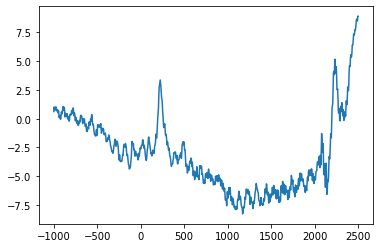

In [56]:
# plot the mean of the data across trials. 
plt.plot(tx, np.mean(data, axis=0))
plt.show()

## Now grab the data from time 0 until time 2000 and FFT it! 
* hint: you can use boolean indexing by selecting the columns from the 'data' matrix that meet: (tx>=0)  & (tx<2000)
* while you're at it, go ahead and grab the timepoints corresponding to that interval as well to use for plotting

In [57]:
bool_filter = (tx>=0) * (tx<= 2000)
dat = data[:,bool_filter]
print(dat.shape)
dat_fft = np.fft.rfft(dat,axis=1)


(960, 501)


## Follow these steps...
* FFT each trial 
* Then compute the amplitude on each trial
* Then compute the average amplitude across all trials
* Then plot - first over all frequs, then zoom in and plot the 55-65hz window and the 5-20Hz window 
* To make this work, note that np.fft.rfft can operate on the entire data matrix at once. You should ALWAYS specify the axis that you want the FFT to work over (in this case the time axis, or axis 1). np.fft.rfft will default to the LAST axis if you specify nothing, which in this case is ok but it would totally NOT be ok if your data were transposed
* hint: handy to store the shape of the data matrix before you do all this so that you can pass in the number of timepoints to the amplitude normalization function and the freq-axis function. e.g. r,c = data.shape

[np.fft.rfft documentation](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.fft.rfft.html)

(960, 251)
(251,)


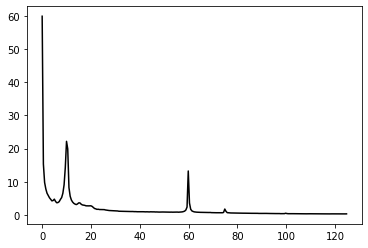

In [58]:
amp_trials = np.abs(dat_fft) # not absolute
amp_trials = (amp_trials  / len(dat_fft[0]) ) * 2  # normalize because no negative freq

avg_amp = np.mean(amp_trials, axis=0)
print(amp_trials.shape)
freq = np.fft.rfftfreq(len(dat[0]), 1/sr)   

print(freq.shape)
plt.plot(freq, avg_amp, 'k')            # plot amplitude 

plt.show()

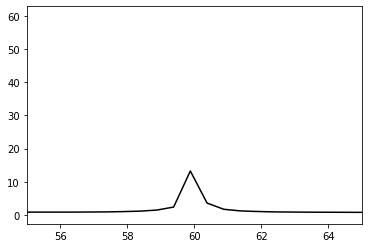

In [59]:
# figure out the indices we want to keep...this time from 55-65Hz...then plot
plt.plot(freq, avg_amp, 'k')            # plot amplitude 
plt.xlim([55,65])
plt.show()

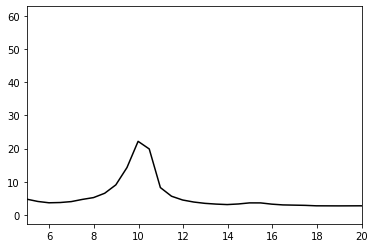

In [60]:
# figure out the indices we want to keep...this time from 5-20Hz...then plot
plt.plot(freq, avg_amp, 'k')            # plot amplitude 
plt.xlim([5,20])
plt.show()

## Switch to a new data set...load eeg_data01.npz. To make it easy I renamed all the variables in this data set to match the var names in the last data set (data, sr, tx)

In [70]:
# load the data...
eeg = np.load('eeg_data01.npz')
data = eeg['data']
sr = eeg['sr']
tx = eeg['tx']

## Plot the data, just like we did above

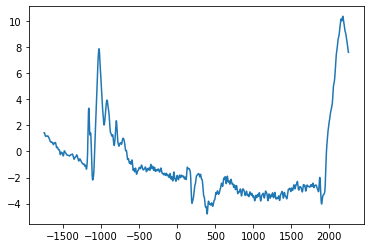

In [71]:
# plot the mean of the data
plt.plot(tx, np.mean(data, axis=0))
plt.show()

## Now segment the data from time 0 to time 1753 and plot to make sure it looks right

(1600, 1796)


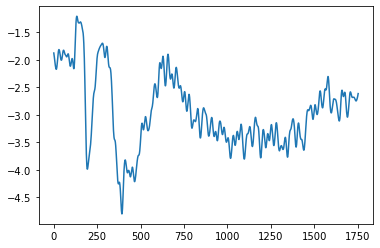

In [72]:
bool_filter = (tx>=0) * (tx<= 1753)
dat = data[:,bool_filter]
print(dat.shape)

# plot the mean of the data
plt.plot(tx[bool_filter], np.mean(data[:,bool_filter], axis=0))
plt.show()

## Next:
* compute the FFT of the data on each trial
* then compute the amp on each trial
* then plot the average amplitude over a window from 12Hz to 35Hz

(1600, 899)


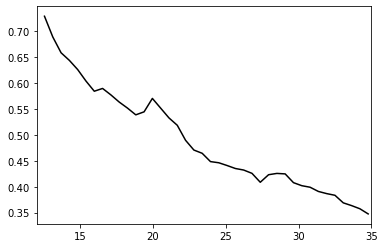

In [88]:
dat_fft = np.fft.rfft(dat,axis=1)
amp_trials = np.abs(dat_fft) # not absolute
amp_trials = (amp_trials  / len(dat_fft) ) * 2  # normalize because no negative freq

print(amp_trials.shape)
freq = np.fft.rfftfreq(len(dat[0]), 1/sr)

avg_amp = np.mean(amp_trials[:,(freq>=12) * (freq<=35)], axis=0)

plt.plot(freq[(freq>=12) * (freq<=35)], avg_amp, 'k')            # plot amplitude 
plt.xlim([12,35])
plt.show()

## Not much going on...so now 
* average the data in the time domain (i.e. avg across all trials) using np.mean
* then FFT, compute amp, then plot over the same window

(899,)


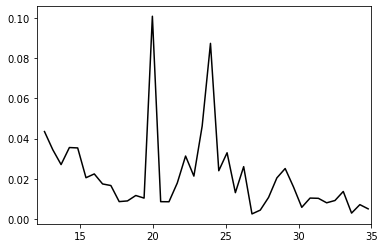

In [90]:
dat_mean = np.mean(dat,axis=0)
dat_fft = np.fft.rfft(dat_mean)
amp_trials = np.abs(dat_fft) # not absolute
amp_trials = (amp_trials  / len(dat_mean) ) * 2  # normalize because no negative freq

freq = np.fft.rfftfreq(len(dat_mean), 1/sr)   

print(freq.shape)
plt.plot(freq[(freq>=12) * (freq<=35)], amp_trials[(freq>=12) * (freq<=35)], 'k')            # plot amplitude 
plt.xlim([12,35])
plt.show()

## now what do you see? 
* what can infer about the experiment based on the difference in the amplitude spectrum from the two different methods (FFT all trials, then convert to amp, then average versus Average in time domain, then FFT and then compute amp)